<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/03%20Machine%20Learning/notebooks/04-Polinomial-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Polinomial

En esta notebook exploraremos y experimentaremos con la regresión polinomial. Veremos varios ejemplos y al final realizaremos una práctica.

In [ ]:
#@title Función para graficar la regresión simple

import matplotlib.pyplot as plt
import numpy as np

def graficar(estimador,x,y):
    xmin = np.min(x)
    xmax = np.max(x)
    x_values = np.linspace(xmin,xmax,100)
    y_values = estimador.predict(x_values.reshape(-1,1))
    y_pred = estimador.predict(x)
    ymin = min(np.min(y),np.min(y_pred))
    ymax = max(np.max(y),np.max(y_pred))
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.scatter(x, y, marker='x',color='blue')
    plt.plot(x_values, y_values, color='black')
    plt.subplot(1,2,2)
    plt.scatter(y,y_pred,color='blue')
    plt.plot(np.linspace(ymin,ymax,100),np.linspace(ymin,ymax,100),color='black')
    plt.show()

## Ejemplo 1

Este primer ejemplo es un ejemplo ilustrativo.

Generemos algunos puntos sobre una parábola y perturbemoslos con ruido de una distribución Gaussiana.

In [ ]:
import numpy as np

rng = np.random.RandomState(4595)
size = 100

b0 = 2
b1 = -1
b2 = 1

x = 3 * rng.rand(size)
y = (b0 + (b1*x) + (b2*x**2)) + rng.randn(size) # Agregamos ruido con distribución normal

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.subplot(1,2,1)
plt.scatter(x,b0 + (b1*x) + (b2*x**2))
plt.subplot(1,2,2)
plt.scatter(x,y)
plt.show()

Hacemos un reshape porque los estimadores de sklearn reciben los arreglos de features como arreglos de tamaño

$$\text{número de instancias}\times\text{número de features}$$

In [ ]:
x.shape

In [ ]:
x = x.reshape(-1,1)
print(x.shape)

Hagamos la división en prueba y entrenamiento. Recordar que hay que hacerla en este punto, para evitar el data leakage.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=2287)

Para crear la nueva feature $x^2$ usaremos la clase [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html).

Esta clase genera una nueva matriz de características (*features*) consistente en todas las combinaciones polinómicas de las caractéristicas de grado menor o igual al grado especificado.

Por ejemplo, si una muestra de entrada es bidimensional con la forma

$$[a, b]$$

las características polinómicas (*polynomial features*) de grado 2 son

$$[1, a, b, a^2, ab, b^2].$$

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

pfeats = PolynomialFeatures(degree=2, include_bias=False)
# pfeats = PolynomialFeatures(degree=2, include_bias=True)
new_x_train = pfeats.fit_transform(x_train)

Observar que le indicamos al constructor de la clase que no incluya el `bias` (la columna de 1s al principio de la nueva matriz de caracteristicas). Esto se hace porque pasaremos esta matriz a la regresión lineal, la cuál le agregará dicha columna.

La variable independiente era:

In [ ]:
print(x_train[:5])

Las nuevas variables independientes son:

In [ ]:
print(new_x_train[:5])

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(new_x_train,y_train)

In [ ]:
lr.score(new_x_train,y_train)

In [ ]:
print(f"Intercepto: {lr.intercept_}")
print(f"Coeficientes: {lr.coef_}")

In [ ]:
b0 = lr.intercept_
b1 = lr.coef_[0]
b2 = lr.coef_[1]

In [ ]:
x_values = np.linspace(0, 3, 100)

y_hat = b0 + b1*x_values + b2*x_values**2
plt.figure()
plt.scatter(x, y, marker='x',color='red')
plt.plot(x_values, y_hat, color='black')
plt.show()

⭕ Ahora evaluemos en el conjunto de prueba

In [ ]:
x_test = pfeats.transform(x_test)

lr.score(x_test,y_test)

In [ ]:
x_test.shape

In [ ]:
x_test

In [ ]:
from sklearn.metrics import mean_absolute_error

y_pred_train = lr.predict(new_x_train)
print(f"MAE entrenamiento: {mean_absolute_error(y_train,y_pred_train)}")

y_pred = lr.predict(x_test)
print(f"MAE prueba: {mean_absolute_error(y_test,y_pred)}")

### Pipelines

In [ ]:
import numpy as np

rng = np.random.RandomState(4595)
size = 100

b0 = 2
b1 = -1
b2 = 1

x = 3 * rng.rand(size)
y = (b0 + (b1*x) + (b2*x**2)) + rng.randn(size) # Agregamos ruido con distribución normal
x = x.reshape(-1,1)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=2287)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler

pl = Pipeline([('pf',PolynomialFeatures(degree=2,include_bias=False)),
               ('lr',LinearRegression())])

In [ ]:
pl.fit(x_train,y_train)

Podemos evaluar directamente el score, aún cuando el score es un método de `LinearRegression`

In [ ]:
x_train.shape

In [ ]:
pl.score(x_train,y_train)

In [ ]:
pl.score(x_test,y_test)

In [ ]:
pl.predict(x_test)

Podemos acceder a los atributos y métodos de cada parte del pipeline de la siguiente forma:

In [ ]:
pl['lr']

In [ ]:
pl['lr'].coef_

In [ ]:
pl['lr'].intercept_

In [ ]:
pl['pf'].n_output_features_

Veamos las predicciones en el conjunto de entrenamiento

In [ ]:
graficar(pl,x_train,y_train)

Ahora veamos y evaluemos las predicciones en el conjunto de prueba

In [ ]:
y_pred = pl.predict(x_test)

In [ ]:
pl.score(x_test,y_test)

In [ ]:
graficar(pl,x_test,y_test)

In [ ]:
from sklearn.metrics import mean_absolute_error

print(f"MAE en el conjunto de prueba: {np.round(mean_absolute_error(y_test,y_pred),3)}")

### Regresión Lineal

También podemos usar este pipeline para probar rápidamente el modelo de regresión lineal.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# from sklearn.feature_selection import

pl = Pipeline([
                ('pf',PolynomialFeatures(degree=3,include_bias=False)),
                ('scaler',MinMaxScaler()),
               ('lr',ElasticNet(0.5))])

pl.fit(x_train,y_train)
print(f"R2 en el conjunto de entrenamiento: {pl.score(x_train,y_train)}")

y_pred = pl.predict(x_test)

print(f"MAE en el conjunto de prueba: {np.round(mean_absolute_error(y_test,y_pred),3)}")

In [ ]:
graficar(pl,x_test,y_test)

Hay ventajas en usar pipelines, permite tener un código más limpio y más control sobre la prueba de diferentes modelos. Por ejemplo, podemos probar varios grados facílmente:

In [ ]:
for k in range(1,5):
    pl = Pipeline([
                ('pf',PolynomialFeatures(degree=k,include_bias=False)),
                ('scaler',MinMaxScaler()),
                ('lr',LinearRegression())])
    pl.fit(x_train,y_train)
    y_pred = pl.predict(x_test)
    print(f"MAE en el conjunto de prueba: {np.round(mean_absolute_error(y_test,y_pred),3)}, grado={k}")

## Ejemplo 2: Práctica

Usaremos el siguiente dataset de datos de peces. Hay un total de 159 filas (muestras de entrenamiento) y 7 columnas en el conjunto de datos.

Los detalles de cada columna son los siguientes

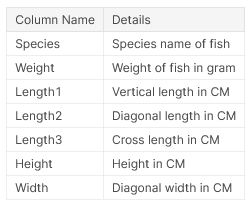

* Las variables independientes son "Especie", "Longitud1", "Longitud2", "Longitud3", "Altura" y "Anchura".
* La variable dependiente es "Peso".

Tenemos que estimar el peso del pez basándonos en sus valores de medición.

In [ ]:
import pandas as pd

url = 'https://github.com/DCDPUAEM/DCDP/raw/main/03%20Machine%20Learning/data/fishes.csv'
df = pd.read_csv(url)
df

# El problema de la multicolinealidad

Sobre la multilinearidad:


*   [Estabilidad numérica](https://en.wikipedia.org/wiki/Multicollinearity#Consequences_of_multicollinearity)
*   [Explicación](https://medium.com/@sujathamudadla1213/why-we-have-to-remove-highly-correlated-features-in-machine-learning-9a8416286f18)



Agreguemos una variable con multicolinealidad perfecta

$$x_1 = 2x_0$$

In [ ]:
import numpy as np

rng = np.random.RandomState(4595)
size = 100

b0 = 2
b1 = -1

x = 3 * rng.rand(size)
y = (b0 + (b1*x) ) + rng.randn(size) # Agregamos ruido con distribución normal

X = np.column_stack((x,2*x))

In [ ]:
print(X[:5])

La clase `LinearRegression` sabe manejar este caso. Sin embargo, tenemos riesgo de inestabilidad numérica

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X,y)

print(lr.coef_)

Sin embargo, si usamos directamente OLS para resolver el problema, tenemos un problema:

In [ ]:
X = np.column_stack((np.ones(shape=x.shape),X))

beta = (np.linalg.inv(np.transpose(X)@X)@np.transpose(X))@y

⭕ Práctica

Construye un modelo de Regresión Lineal (Polinomial) para predecir el peso de un pez en función de las variables predictoras.

**Preprocesamiento**

* Verifica si hay valores faltantes.
* Verifica la correlación entre variables usando el método [corr()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html) del dataframe. Considera eliminar las variables con correlación para evitar la colinearidad. **Prueba con ambas opciones:** dejar todas las variables o no.
* Explora la relación entre pares de variables usando [pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html) de seaborn. Esto te puede ayudar a visualizar qué variables están más correlacionadas con la variable a predecir, además, de dar una idea de cómo es la relación.
* Verifica el rango de las variables (no solamente el rango, sino también el máximo y mínimo). **Prueba con diferentes tipos de re-escalamiento y sin re-escalamiento**.
* Usar PolinomialFeatures en función de tus observaciones del punto anterior. **Prueba con diferentes grados del polinomio.**
* Usa la codificación one-hot para la(s) variable(s) categórica(s). **Prueba ambas opciones: incluye esta variable o no.**

**Regresión Lineal**

Entrena un modelo de RL separando el 80% para entrenamiento y reporta la métrica de rendimiento MAE y MSE. **Además, prueba usando regularización**



**Pasos a realizar**

1.   Primero prueba con el siguiente modelo: Regresión Polinomial de grado 2 con todas las variables numéricas, sin re-escalamiento, sin la variable categórica (intenta implementarlo como pipeline).
2.  El mismo modelo anterior pero implementado como pipeline, en caso de que no lo hayas hecho así en el punto anterior.
3.  Prueba diferentes modelos considerando las combinaciones de técnicas descritas arriba. Reporta el modelo que haya logrado el MAE/MSE más bajo.



**Responde las siguientes preguntas:**

* ¿Qué efecto tiene dejar todas las variables contra quitar variables correlacionadas?
* ¿Cuál es el grado que mejor funcionó?

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error